#### Date: 29 Sept 2020
#### content writter: Nken Allassan, CEO CO-founder of WedOO.ai
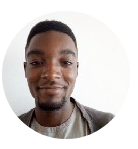

### As a summary in this post we will learn the foundation of pandas

#### content !
1. [Review of pandas](#1)
1. [Building dataframes from scratch](#2)
1. [visual exploratory data analysis](#3)
1. [Statistical exploratory data analysis](#4)
1. [Indexing pandas time series](#5)
1. [Resampling pandas time series](#6)

<a id='1'></a><br>
### Review of pandas
we will go deeper in pandas sooner or later firstly we need to have some notions.
* single column = series
* NaN = not a number
* dataframe.values = numpy

<a id="2"></a> <br>
### BUILDING DATA FRAMES FROM SCRATCH
* We can build data frames from csv files (comma seperated values).
* Also we can build dataframe from dictionaries
    * zip() method: This function returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.
* Adding new column
* Broadcasting: Create new column and assign a value to entire column

In [2]:
import pandas as pd

In [3]:
# data frames from dictionary
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


In [4]:
# Add new columns
df["capital"] = ["madrid","paris"]
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [5]:
# Broadcasting
df["income"] = 0 #Broadcasting entire column
df

,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0


<a id="3"></a> <br>
### VISUAL EXPLORATORY DATA ANALYSIS
<br>We start by loading data from a csv file (using **pd.read_csv**(file_name.ipynb))
* Plot
* Subplot
* Histogram:
    * bins: number of bins
    * range(tuple): min and max values of bins
    * normed(boolean): normalize or not
    * cumulative(boolean): compute cumulative distribution

In [9]:
data=pd.read_csv('fuel-econ.csv')
data

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5


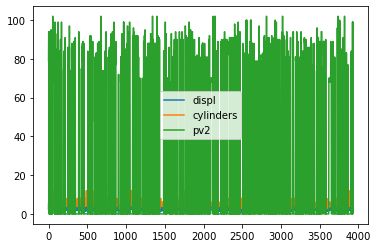

In [10]:
# Plotting all data 
data1 = data.loc[:,["displ","cylinders","pv2"]]
data1.plot()
# it is confusing

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA90E24C40>,
      dtype=object)

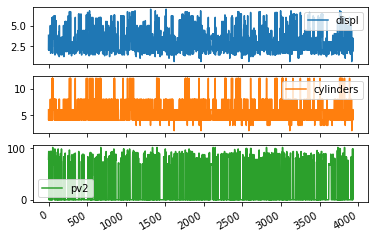

In [12]:
# subplots
data1.plot(subplots = True)
#plt.show()

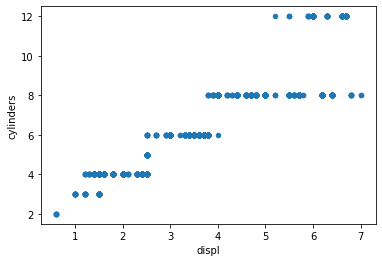

In [15]:
# scatter plot  
data1.plot(kind = "scatter",x="displ",y = "cylinders")

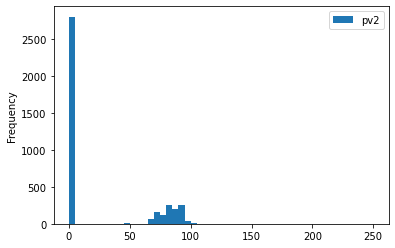

In [18]:
# hist plot  
data1.plot(kind = "hist",y = "pv2",bins = 50,range= (0,250))

<a id="4"></a> <br>
### STATISTICAL EXPLORATORY DATA ANALYSIS
I already explained it at previous parts. However lets look at one more time.
* count: number of entries
* mean: average of entries
* std: standart deviation
* min: minimum entry
* 25%: first quantile
* 50%: median or second quantile
* 75%: third quantile
* max: maximum entry

In [19]:
data1.describe()

,displ,cylinders,pv2
count,3929.000000,3929.000000,3929.000000
mean,2.950573,5.468313,23.660982
std,1.305901,1.878319,37.724901
min,0.600000,2.000000,0.000000
25%,2.000000,4.000000,0.000000
50%,2.500000,5.000000,0.000000
75%,3.600000,6.000000,70.000000
max,7.000000,12.000000,102.000000


<a id="5"></a> <br>
### INDEXING PANDAS TIME SERIES
* datetime = object
* parse_dates(boolean): Transform date to ISO 8601 (yyyy-mm-dd hh:mm:ss ) format

In [20]:
time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1])) # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


<a id="6"></a> <br>
### RESAMPLING PANDAS TIME SERIES
* Resampling: statistical method over different time intervals
    * Needs string to specify frequency like "M" = month or "A" = year
* Downsampling: reduce date time rows to slower frequency like from daily to weekly
* Upsampling: increase date time rows to faster frequency like from daily to hourly
* Interpolate: Interpolate values according to different methods like ‘linear’, ‘time’ or index’ 
    * https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html

In [ ]:
# We will use a random dataframe data_x that we create at previous part
data_x.resample("A").mean()

In [ ]:
# In real life (data is real. Not created from us like data_x) we can solve this problem with interpolate
# We can interpolete from first value
data2.resample("M").first().interpolate("linear")